# Lab : chatbot on a knowledge base

In this lab, we'll implement a chatbot as seen in the lecture. The global idea and architecture of RAG can be described as in the following image

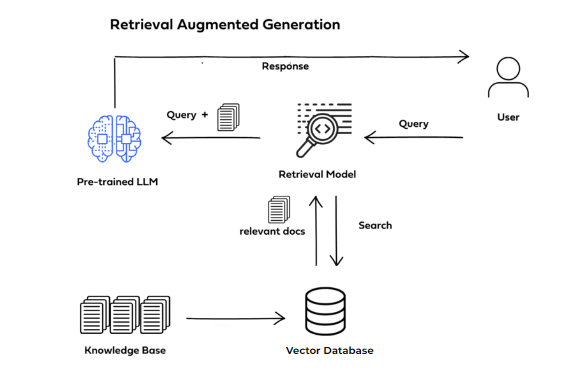

In order to create our chatbot, we'll implement the following pipeline :

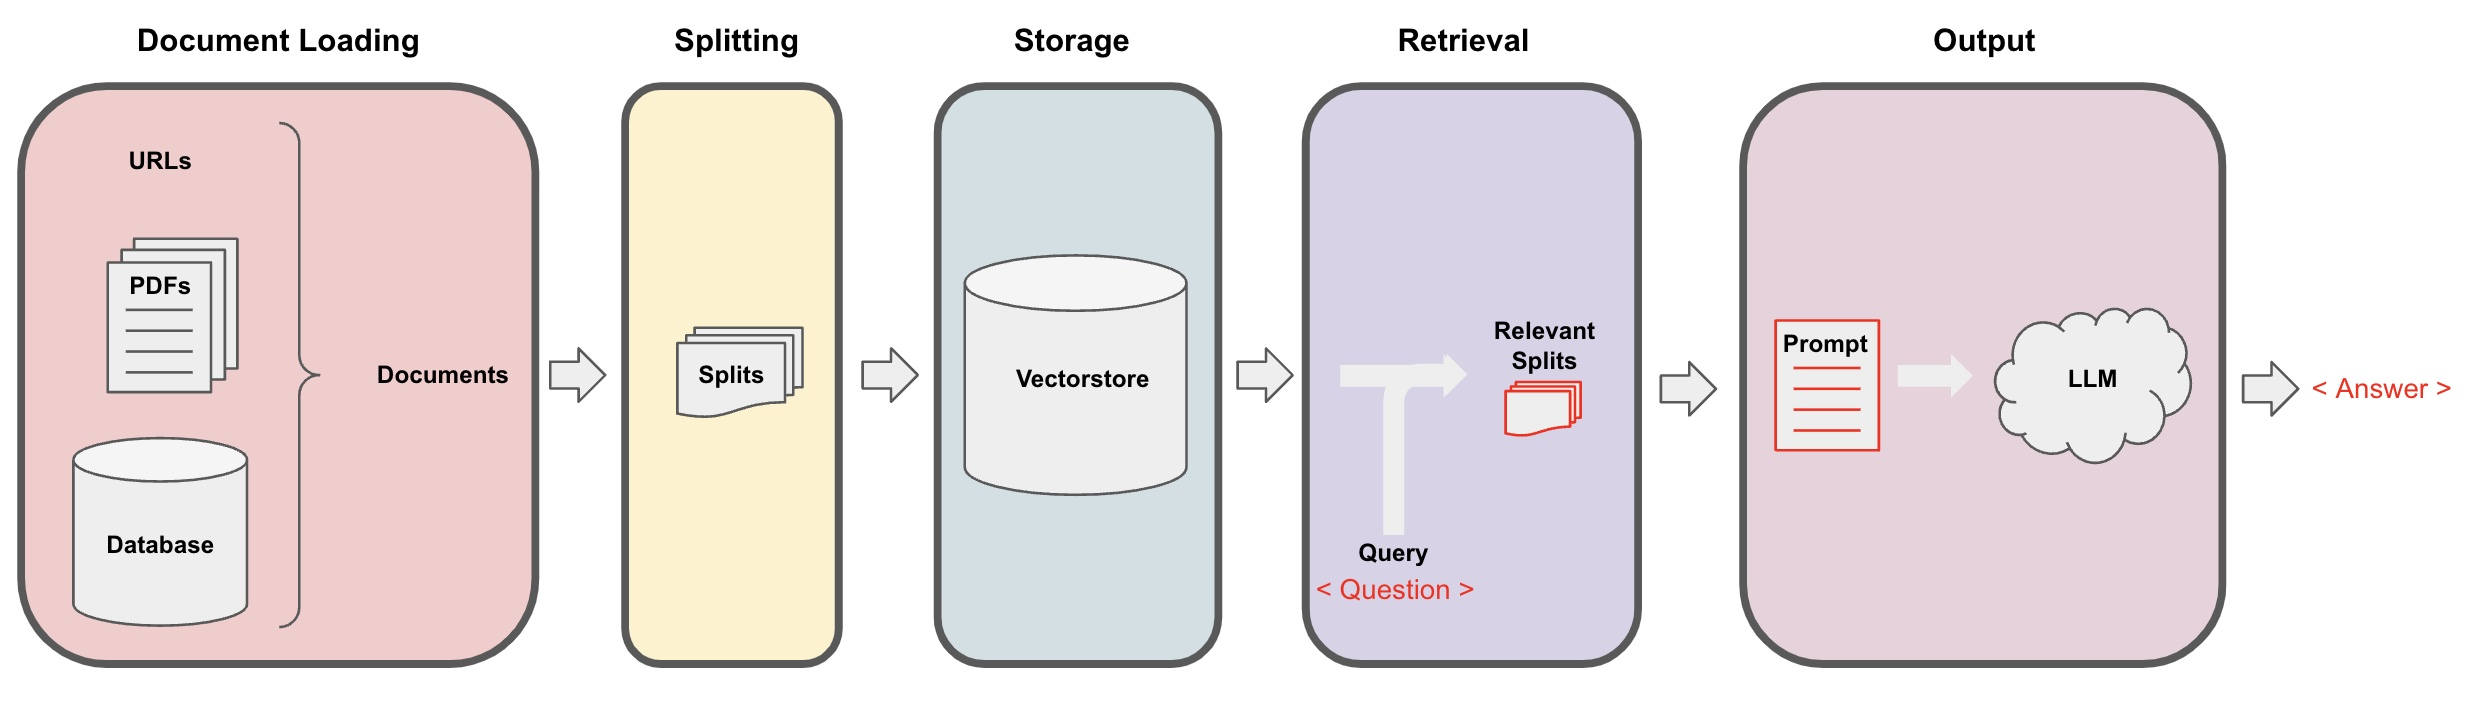

- We will use [Ollama](https://ollama.ai), it's a tool to easily use local llm (it can download any llms and serve a local server for it).

- We will also use langchain to implement the chatbot mechanism.

The first part will be a tutorial helping you to understand all the principles seen in the lecture, and will guide you through the technical implementation of those concepts. Take the time to really understand the concepts and to answer the questions and modify the code when necessary. Then, once you'll have understood the main principles, you'll do some exercises to apply all the notions you'll have seen to a specific use case that interests you.

# Installation to run directly on Google Colab
1. click on the down arrow next to Connect in the top right corner and then `Change run time type` -> `T4 GPU` -> Save
1. Execute the following cells *(`!` allows to execute system calls to terminal and not execute python code)*

In [2]:
# to execute the first time only (or if the Colab environment has been deleted)
!curl https://ollama.ai/install.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0>>> Downloading ollama...


100 10091    0 10091    0     0  32033      0 --:--:-- --:--:-- --:--:-- 32136
######################################################################## 100,0%##O=#  #                                                                         80,9%#####################                81,5%    82,6%
>>> Installing ollama to /usr/local/bin...
[sudo] Mot de passe de marius : 


**🔴IMPORTANT❗ If you stop a running cell on Google Colab, it will stop also Ollama, you will have to run the following again (or you will have a ConnectionRefused error)**

In [ ]:
# to execute each time you run this notebook (run the ollama server)
!nohup ollama serve &>/dev/null&

In [ ]:
MODEL = 'llama2:13b-chat'

In [ ]:
# to execute the first time only (or if the Colab environment has been deleted)
!ollama pull {MODEL}

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest 
pulling 2609048d349e... 100% ▕▏ 7.4 GB                         
pulling 8c17c2ebb0ea... 100% ▕▏ 7.0 KB                         
pulling 7c23fb36d801... 100% ▕▏ 4.8 KB                         
pulling 2e0493f67d0c... 100% ▕▏   59 B                         
pulling fa304d675061... 100% ▕▏   91 B                         
pulling be61bcdf308e... 100% ▕▏  558 B                         
verifying sha256 digest ⠋ pulling manifest 
pulling 2609048d349e... 100% ▕▏ 7.4 GB                         
pulling 8c17c2ebb0ea... 100% ▕▏ 7.0 KB                         
pulling 7c23fb36d801... 100% ▕▏ 4.8 KB                         
pulling 2e0493f67d0c... 100% ▕▏   59 B                         
pulling fa304d675061... 100% ▕▏   91 B                         
pulling be61bcdf308e... 100% ▕▏  558 B                         
verifying sha256 digest ⠙ pulling man

In [5]:
!pip install chromadb langchain[docarray] sentence_transformers pymupdf faiss-cpu langchain_community

Defaulting to user installation because normal site-packages is not writeable
  Using cached chromadb-0.5.0-py3-none-any.whl (526 kB)
  Using cached langchain-0.2.0-py3-none-any.whl (973 kB)
  Using cached sentence_transformers-2.7.0-py3-none-any.whl (171 kB)
  Using cached PyMuPDF-1.24.4-cp310-none-manylinux2014_x86_64.whl (3.5 MB)
  Using cached faiss_cpu-1.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (27.0 MB)
  Using cached langchain_community-0.2.0-py3-none-any.whl (2.1 MB)
  Using cached PyYAML-6.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (705 kB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1.24.0-py3-none-any.whl (18 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
  Using cached mmh3-4.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (67 kB)
  Using cached onnxruntime-1.18.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.8 MB)
  Using cached 

# (Optional) Installation to run locally on your machine instead

## Run local **on your machine**
### Before the practical (sent on discord)
1. `!curl https://ollama.ai/install.sh | sh` on Linux or WSL
1. `ollama serve`
1. `ollama pull llama2:13b-chat` if you have a powerfull Nvidia GPU with drivers installed, otherwise `ollama pull orca-mini` (which is way more lightweight but not as good)

### Practical day
0. Plug In your computer, you'll need power ⚡🪫
0. Run ollama server with `ollama serve`
0. `jupyter notebook` in the notebook file folder


# LLM


we can start by loading our Large Language Model and trying it out

In [ ]:
pip install langchain[docarray] sentence_transformers pymupdf faiss-cpu -qqq --progress-bar off langchain_community

In [6]:
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain.llms import Ollama
from langchain.chat_models import ChatOllama
from pprint import pprint
# langchain.debug = True # uncomment if you want to see what's going on under the hood

llm = Ollama(
    model=MODEL, callback_manager=CallbackManager([StreamingStdOutCallbackHandler()]),
    temperature=0 # creativity of the model from 0 to 1 (more creative)
)

NameError: name 'MODEL' is not defined

In [ ]:
# You can have fun with it, try it !
message = llm("What carrer Obama would have really wanted to do?")


It is difficult to say with certainty what career Barack Obama would have wanted to pursue if he had not become a politician. However, based on his background and interests, here are some possible careers he may have considered:

1. Law Professor: Before entering politics, Obama taught constitutional law at the University of Chicago Law School for 12 years. He may have enjoyed continuing in this career, teaching and mentoring students, and writing scholarly articles on legal issues.
2. Civil Rights Attorney: As a young man, Obama worked as a community organizer and advocate for social justice in Chicago. He may have wanted to continue this work as a civil rights attorney, fighting for the rights of marginalized communities and individuals.
3. Environmentalist: Obama has been an advocate for environmental issues throughout his political career, and he may have wanted to pursue a career in environmental activism or policy-making if he had not become a politician.
4. Writer or Journalist

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory, ConversationBufferWindowMemory
from langchain.prompts import PromptTemplate

template="""
[INST] <<SYS>> The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know. \n\nCurrent conversation:\n {history}
 <</SYS>>

\nHuman: {input}\nAI: [/INST]
"""

memory = ConversationBufferMemory() # ConversationBufferWindowMemory(k=1) # you can choose how long the history is kept
conversation = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=True,
    prompt=PromptTemplate(input_variables=['history', 'input'], template=template)
)

As you can see here, the prompt is made according to a specific format. There is an instruction and the system message. Each LLM has its own specific format so if you want to change the LLM, please check the LLM documentation to see how to write your prompt.
For example here is the document of our model (llama2:13b-chat) : https://ollama.ai/library/llama2:13b-chat


In [ ]:
m = conversation.predict(input="Hi, my name is Camille")



> Entering new ConversationChain chain...
Prompt after formatting:

[INST] <<SYS>> The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know. 

Current conversation:
 
 <</SYS>>


Human: Hi, my name is Camille
AI: [/INST]

 Hello Camille! My name is LLaMA, I'm a large language model trained by a team of researcher at Meta AI. It's nice to meet you! 😊 Can you tell me a bit about yourself? What brings you here today?
> Finished chain.


In [ ]:
m = conversation.predict(input="what is my name ? ")



> Entering new ConversationChain chain...
Prompt after formatting:

[INST] <<SYS>> The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know. 

Current conversation:
 Human: Hi, my name is Camille
AI:  Hello Camille! My name is LLaMA, I'm a large language model trained by a team of researcher at Meta AI. It's nice to meet you! 😊 Can you tell me a bit about yourself? What brings you here today?
 <</SYS>>


Human: what is my name ? 
AI: [/INST]

  Hello Camille! My name is LLaMA, I'm a large language model trained by a team of researcher at Meta AI. It's nice to meet you! 😊 Based on our conversation, your name is Camille. Is there anything else you would like to talk about or ask me? I'm here to help with any questions you may have!
> Finished chain.


The memory can rapidly become too important. It would slow down your LLM as you're talking with it. Too much context can be also confusing. One solution is to do a summary of the current conversation with a defined limit of tokens :

### Summarized memory

Each time the conversation is larger than a defined number of tokens, we will use a LLM to summarize the conversation, and add it to the user's newest message

We start by

In [ ]:
PERSONAL_SUMMARIZER_TEMPLATE = """[INST] <<SYS>> Progressively summarize the lines of conversation provided, adding onto the previous summary returning a new summary.

EXAMPLE
Current summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good.

New lines of conversation:
Human: Why do you think artificial intelligence is a force for good?
AI: Because artificial intelligence will help humans reach their full potential.

New summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.
END OF EXAMPLE

Do not mention the previous example as it is simply given as a reference. Only return a new summary from the information contained in the current summary and the new lines of conversation.

 <</SYS>>

Current summary:
{summary}

New lines of conversation:
{new_lines}

New summary: [/INST]"""

SUMMARY_PROMPT = PromptTemplate(
    input_variables=["summary", "new_lines"], template=PERSONAL_SUMMARIZER_TEMPLATE
)


In [ ]:
from langchain.memory import ConversationSummaryBufferMemory
import langchain


# summarizer llm
summarizer_llm = ChatOllama(
    model=MODEL,
    callback_manager=CallbackManager([StreamingStdOutCallbackHandler()]),
    temperature=0,
    verbose=False
)

#we create our conversation summary buffer, it will reccord messsages and summarize the exchange when needed
memory = ConversationSummaryBufferMemory(llm=summarizer_llm, max_token_limit=100,prompt=SUMMARY_PROMPT)


#we will reccord a fake conversation between the user and the llm to the context
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})

schedule_answer = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory.save_context({"input": "What is on the schedule today?"},
                    {"output": f"{schedule_answer}"})

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]


Current summary:

New lines of conversation:
Human: Hello
AI: What's up
Human: Not much, just hanging
AI: Cool
Human: What is on the schedule today?

New summary: The human greets the AI and asks about the schedule for the day.

In [ ]:
pprint(memory.load_memory_variables({}))

we can later use the saved memory context in our new conversation chain and continue our exchange

In [ ]:
chatbot_summary_template="""
[INST] <<SYS>> The following is the summary of a conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know. \n\n {history}
 <</SYS>>

\nHuman: {input}\nAI: [/INST]
"""

# langchain.debug = True

# chatbot llm
llm = ChatOllama(
    model=MODEL,
    verbose=True,
    callback_manager=CallbackManager([StreamingStdOutCallbackHandler()]),
    temperature=0,

)

conversation = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=True,
    prompt=PromptTemplate(input_variables=['history', 'input'], template=chatbot_summary_template)
)

res=conversation.predict(input="What would be a good demo to show?")


We have seen how to use langchain in order to make use of our large language model as a chatbot.

However the llm can only use data it was pretrained on which can be insufficient,  out of date or unreliable. We will now move on to implement our RAG architecture starting by the establishment of our vector database

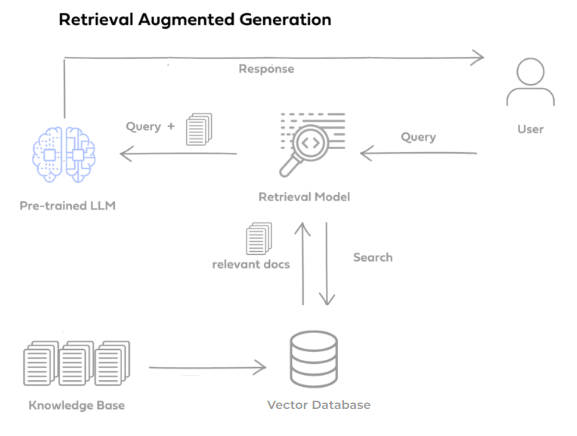

# Embeddings
An embedding allows to transform words or sentences to a vector with a meaning. Different methods for embeddings are possible.

In [ ]:
from pprint import pprint # pretty print for printing lists
from langchain.embeddings import OllamaEmbeddings

# On peut utiliser des modeles de Ollama ou ceux de hugging face

oembed = OllamaEmbeddings(model=MODEL)
sentence_embedding=oembed.embed_query("Llamas are social animals and live with others as a herd.")
print("legnth of the embedding",len(sentence_embedding))
sentence_embedding[0:10]

legnth of the embedding 5120


[-0.19980213046073914,
 0.1565839648246765,
 0.7094722390174866,
 -0.02838153764605522,
 0.1617000699043274,
 -0.17218048870563507,
 0.9926580786705017,
 0.18428711593151093,
 0.38339659571647644,
 0.229389950633049]

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

sentence_embedding=embeddings.embed_query("Llamas are social animals and live with others as a herd.")
print("legnth of the embedding",len(sentence_embedding))
sentence_embedding[0:10]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

legnth of the embedding 384


[0.03891480714082718,
 0.029400311410427094,
 -0.02059655822813511,
 0.049970198422670364,
 -0.038452547043561935,
 -0.023562530055642128,
 -0.06679389625787735,
 -0.08700815588235855,
 0.022990407422184944,
 0.0977286547422409]

# Document loading
The first step is to load a document from which the LLM will extract information. Langchain provides a lot of connectors to easily get data from virtually anywhere. You can check all the options available here :
* [Document loader](https://python.langchain.com/docs/modules/data_connection/document_loaders/)
* [Community Document Loader](https://python.langchain.com/docs/integrations/document_loaders)


Please click on the folder icon on the left of the screen and drag and drop the INFOFORBOT.pdf in there.

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader("./sd.pdf")
data = loader.load()
pprint(data)

[Document(page_content='', metadata={'source': './sd.pdf', 'file_path': './sd.pdf', 'page': 0, 'total_pages': 25, 'format': 'PDF 1.4', 'title': 'MetaTune User Guide', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Pages', 'producer': 'macOS Version 10.15.7 (Build 19H15) Quartz PDFContext', 'creationDate': 'D:20210817092233Z', 'modDate': "D:20210817112516+02'00'", 'trapped': ''}),
 Document(page_content='Introduction\n3 \nRequirements\n4 \nmacOS \n4 \nWindows \n4 \niLok \n4 \nQuick Start\n5 \nFinding and setting your Key\n6 \nTone \n8 \nChromatic toggle \n8 \nLearning the controls\n9 \nSpeed \n9 \nAmount \n9 \nSustain \n10 \nNote Stabilizer \n11 \nA word about latency \n12 \nUsing the Keyboard \n12 \nDetected Notes & HeatMaps \n13 \nPitch Reference \n14 \nNext level stuﬀ\n15 \nDoubler \n15 \nGroups \n15 \nA word about Automation \n17 \nUsing the Preset Browser \n18 \nNote Stabilizer / Low Latency \n19 \nWhat the Top Bar does \n19 \nKeyboard Shortcuts List \n20 \niLok Protectio

# Splitting
The LLM cannot process all information as one string or vector. We need to split the documents into smaller chunks of data. But to not loose sense, we split with overlaps because the contexte can be important around a chunk.
* [TextSplitters](https://python.langchain.com/docs/modules/data_connection/document_transformers/)

## Which general splitter ?

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter, MarkdownHeaderTextSplitter, HTMLHeaderTextSplitter

some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

print("length of the text", len(some_text))

c_splitter = CharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separator = ' '
)

r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separators=["\n\n", "\n", " ", ""] # splits first with '\n\n' separator then split with '\n', ... until the chunk has the right size
)


def print_list(l, name):
  print(f'{name} with {len(l)} elements : [');[print('\t"',item.replace('\n', ' '),'",\n') for item in l];print(']')

print_list(c_splitter.split_text(some_text), 'Character')

print_list(r_splitter.split_text(some_text), 'Recursive')

length of the text 496
Character with 2 elements : [
	" When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.    Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also, ",

	" have a space.and words are separated by space. ",

]
Recursive with 2 elements : [
	" When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. ",

	" Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this str

Look at the result above. What is different and why ? Which one seems better ? Why ?

## Specialized splitters & combination of splitter
Depending on the type of document, splits can be made more cleverly.
For example, with a Web Page, you have a structure, with titles and sections. It would be bad to have two sections in one split. But it's not enough, if one section is longer than the chunk size you defined, you need to split a second time :

In [ ]:
# Split into chunks
html_splitter = HTMLHeaderTextSplitter(headers_to_split_on=[
    ("h1", "Header 1"),
    ("h2", "Header 2"),
    ("h3", "Header 3"),
])
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=100)

html_splits = html_splitter.split_text_from_url('https://en.wikipedia.org/wiki/Vector_database')
print(f'HTML splits ({len(html_splits)}):')
pprint(html_splits)

all_splits = text_splitter.split_documents(html_splits)
print(f'\nRecursive splits after HTML splits ({len(all_splits)}):')
pprint(all_splits)

HTML splits (9):
[Document(page_content='Main menu  \nmove to sidebar hide  \nMain menu  \nNavigation  \nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate  \nContribute  \nHelpLearn to editCommunity portalRecent changesUpload file  \nSearch  \nSearch  \nCreate account Log in  \nPersonal tools  \nCreate account Log in  \nPages for logged out editors learn more  \nContributionsTalk  \nContents move to sidebar hide  \n(Top)  \n1Techniques  \n2Implementations  \n3See also  \n4References  \n5External links  \nVector database'),
 Document(page_content='Toggle the table of contents  \n5 languages  \nCatalàČeštinaDeutschFrançaisУкраїнська  \nEdit links  \nArticleTalk  \nEnglish  \nReadEditView history  \nTools  \nmove to sidebar hide  \nTools  \nActions  \nReadEditView history  \nGeneral  \nWhat links hereRelated changesUpload fileSpecial pagesPermanent linkPage informationCite this pageGet shortened URLDownload QR codeWikidata item  \nPrint/export  \nDownload as PDF

# Vector store
We store our documents in a Vector Database

In [ ]:
# Embed and store
from langchain.embeddings import (
    OllamaEmbeddings,
)
from langchain.vectorstores import Chroma

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader("./sd.pdf")
data = loader.load()
#pprint(data)
pages = []
data= data[3:len(data)]
for docu in data:
    newtext = docu.page_content
    if newtext != '':
        pages.append(newtext)

# Join all the pages into a single string
huge_text = ' '.join(pages)

# Now huge_text contains all the page_content joined together
print(huge_text)

Requirements 
macOS 
•
macOS 10.13,10.14, 10.15 & 11.0 
•
Intel Processor, 4GB RAM 
•
VST2, VST3, AU or AAX 64-bit host 
Windows 
•
Windows 8 or 10 
•
Intel or AMD Processor, 4GB RAM 
•
VST2, VST3 or AAX 64-bit host 
iLok 
An iLok account (free!) is required to use our plugins.
All Access Pass members can use either iLok Cloud or an iLok 2 or 3 USB dongle.
Perpetual users need to have a physical iLok 2 or 3 dongle to use Slate Digital plugins.
More information about iLok, iLok Cloud and iLok USB dongles is available here. 
 
 Quick Start 
If you’re already familiar with auto tuning software, you’ll be amazed at how fast you’ll be 
up & running with MetaTune.
Load MetaTune as an insert effect on your audio track: 
Select the key you want your audio to tune to from the Scale Display on the left.
Then play your track, adjusting the Speed and Amount knobs to get the sound you want:
99% of the time, this will give you the sound you’re looking for. 
But don’t stop there! MetaTune has feature

In [ ]:
print(huge_text)
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=400,
    chunk_overlap=70,
    separators=["\n22","\n\n", "\n", " ", ""] # splits first with '\n\n' separator then split with '\n', ... until the chunk has the right size
)

all_splits = text_splitter.split_documents(data)

pprint(all_splits)

vectorstoreChroma = Chroma.from_documents(documents=all_splits, embedding=oembed)

Requirements 
macOS 
•
macOS 10.13,10.14, 10.15 & 11.0 
•
Intel Processor, 4GB RAM 
•
VST2, VST3, AU or AAX 64-bit host 
Windows 
•
Windows 8 or 10 
•
Intel or AMD Processor, 4GB RAM 
•
VST2, VST3 or AAX 64-bit host 
iLok 
An iLok account (free!) is required to use our plugins.
All Access Pass members can use either iLok Cloud or an iLok 2 or 3 USB dongle.
Perpetual users need to have a physical iLok 2 or 3 dongle to use Slate Digital plugins.
More information about iLok, iLok Cloud and iLok USB dongles is available here. 
 
 Quick Start 
If you’re already familiar with auto tuning software, you’ll be amazed at how fast you’ll be 
up & running with MetaTune.
Load MetaTune as an insert effect on your audio track: 
Select the key you want your audio to tune to from the Scale Display on the left.
Then play your track, adjusting the Speed and Amount knobs to get the sound you want:
99% of the time, this will give you the sound you’re looking for. 
But don’t stop there! MetaTune has feature

Different types of vector databases are available. Let's store our documents in another vector database so that we can compare Chroma and FAISS, 2 very famous vector databases.

In [ ]:
from langchain_community.vectorstores import FAISS
text_splitter = RecursiveCharacterTextSplitter(chunk_size=80, chunk_overlap=10)

all_splits = text_splitter.split_documents(data)

vectorstoreFAISS = FAISS.from_documents(all_splits,embedding=oembed)

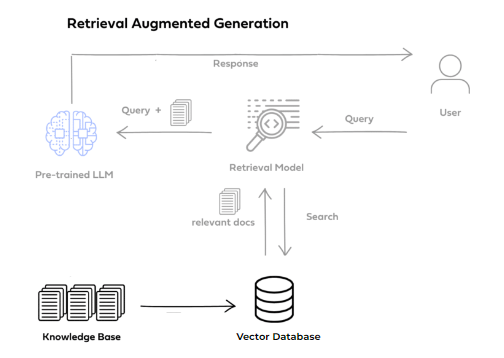

We have just created our vector database and showed you how you can add your knowledge base to it.

While the given example relies on a simple and restricted database, usual use cases involve large amounts of data which make it necessary to carefully choose or adapt your splitting method.

# Retrieval
The vector store allows to get back chunks of our stored documents from a query based on similarity between the prompt and the documents in our vector database. The lower the similarity score, the greater the similarity between the documents.

Execute the following cell and check what are the most relevant docs ? Are they the best documents ? What could we do to have better results ? Apply those changes and see the new results

In [ ]:
question = "how could I do a really modern auto tune effect ?"

In [ ]:
docs = vectorstoreChroma.similarity_search_with_score(question)
print("Number of documents returned : ",len(docs))
pprint(docs)

Number of documents returned :  4
[(Document(page_content='Chromatic toggle can help you hear the notes your original audio source is actually closest \nto.', metadata={'author': '', 'creationDate': 'D:20210817092233Z', 'creator': 'Pages', 'file_path': './sd.pdf', 'format': 'PDF 1.4', 'keywords': '', 'modDate': "D:20210817112516+02'00'", 'page': 7, 'producer': 'macOS Version 10.15.7 (Build 19H15) Quartz PDFContext', 'source': './sd.pdf', 'subject': '', 'title': 'MetaTune User Guide', 'total_pages': 25, 'trapped': ''}),
  4608.35009765625),
 (Document(page_content='The Scale display will now show the scale you selected.\xa0\nYou can also change or transpose your Scale from one Key to another using this menu.', metadata={'author': '', 'creationDate': 'D:20210817092233Z', 'creator': 'Pages', 'file_path': './sd.pdf', 'format': 'PDF 1.4', 'keywords': '', 'modDate': "D:20210817112516+02'00'", 'page': 6, 'producer': 'macOS Version 10.15.7 (Build 19H15) Quartz PDFContext', 'source': './sd.pdf'

In [ ]:
docs = vectorstoreFAISS.similarity_search_with_score(question)
print("Number of documents returned : ",len(docs))
pprint(docs)

NameError: name 'vectorstoreFAISS' is not defined

An alternative to similarity search is `search_type="mmr"` which uses the **Maximum Marginal Relevance search** where it optimizes for similarity to query AND **diversity** among selected documents. It can be useful if we have multiple time the same information: with this technique, we avoid redonduncy.

you can use mmr like this : `retriever = vectorstore.as_retriever(search_type="mmr")`

In [ ]:
retriever = vectorstoreChroma.as_retriever(search_type="mmr")
docs = retriever.get_relevant_documents(question)
pprint(docs)

[Document(page_content='Chromatic toggle can help you hear the notes your original audio source is actually closest \nto.', metadata={'author': '', 'creationDate': 'D:20210817092233Z', 'creator': 'Pages', 'file_path': './sd.pdf', 'format': 'PDF 1.4', 'keywords': '', 'modDate': "D:20210817112516+02'00'", 'page': 7, 'producer': 'macOS Version 10.15.7 (Build 19H15) Quartz PDFContext', 'source': './sd.pdf', 'subject': '', 'title': 'MetaTune User Guide', 'total_pages': 25, 'trapped': ''}),
 Document(page_content='something like this: \nThis can help you identify the key and/or notes to correct your audio to. Detected Notes \nshows you the ﬁnal output of your audio after MetaTune has processed it. If you want to \nsee what notes are most commonly occurring in your source audio, use the Chromatic \ntoggle feature described above.\nTo disable Detected Notes, click on the eye symbol over on the right:', metadata={'author': '', 'creationDate': 'D:20210817092233Z', 'creator': 'Pages', 'file_path'

For FAISS, we can define k as the number of documents we want to return, and fetch_k as the number of documents pre selected to then select again which documents provide the same information and so should be removed.

In [ ]:
docs = vectorstoreFAISS.similarity_search_with_score(question,k=4, fetch_k=6)
print("Number of documents returned : ",len(docs))
pprint(docs)

NameError: name 'vectorstoreFAISS' is not defined

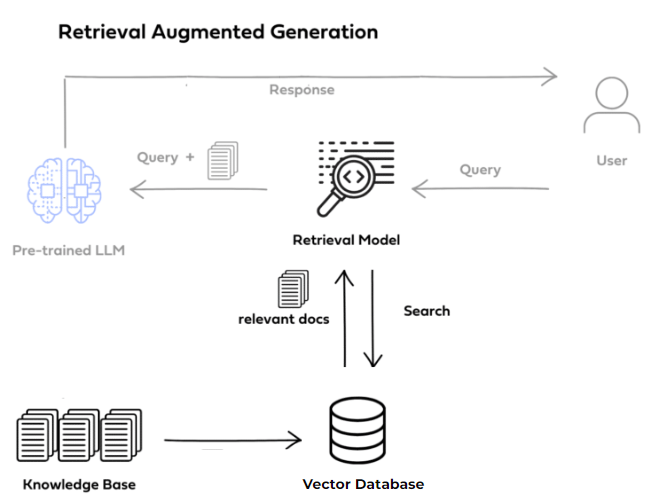

we have just seen how to extract data from our vector database using natural language queries. We will now need to connect the retrieving model to our Large Langage Model in order to process the collected data and answer the user's question

## RAG prompt

## RAG Prompt
Langchain allows to write your own *under the hood* prompt



In [ ]:
from langchain.prompts import PromptTemplate

# Build prompt
QA_TEMPLATE = """
[INST] <<SYS>> Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer
{context} <</SYS>>

Question: {question}
Helpful Answer: [/INST]
"""

QA_CHAIN_PROMPT = PromptTemplate.from_template(QA_TEMPLATE)
QA_CHAIN_PROMPT

PromptTemplate(input_variables=['context', 'question'], template='\n[INST] <<SYS>> Use the following pieces of context to answer the question at the end. If you don\'t know the answer, just say that you don\'t know, don\'t try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer\n{context} <</SYS>>\n\nQuestion: {question}\nHelpful Answer: [/INST]\n')

In [ ]:
# LLM
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain.llms import Ollama
from langchain.chat_models import ChatOllama

llm = ChatOllama(
    model=MODEL,
    verbose=True,
    callback_manager=CallbackManager([StreamingStdOutCallbackHandler()]),
    temperature=0  # temperature = level of creativity (&hallucinations) from 0 to 1 (float) => For RAG, 0 is better
)

In [ ]:
# QA chain
from langchain.chains import RetrievalQA
import langchain
# langchain.debug = True

qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=retriever,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT},

)

In [ ]:
result = qa_chain({"query": question})

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Hey there! To achieve a really modern auto-tune effect, you could use the Chromatic Toggle feature in MetaTune to hear the notes your original audio source is closest to, and then use the Note Stabilizer feature to create an even harder tuning effect without any fluttering during note changes. This will give you a super current and cutting-edge sound! Thanks for asking! 😊

## Chain Type


In [ ]:
from langchain.chains import RetrievalQA

question = "What does Peggy Cellier teach ?"

###(Optional)
If you wish to visualize what langchain is doing under the hood on the following part, you can experiment on the `LangSmith platform` (it's free):

 * Go to [LangSmith](https://smith.langchain.com/) and sign up
 * Use the invite code "lang_learners_2023"
 * Create an API key from your account's settings
 * Use this API key in the code below   
 * uncomment the code

In [ ]:
# import os
# os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_ENDPOINT"] = "https://api.langchain.plus"
# os.environ["LANGCHAIN_API_KEY"] = "enter your key" #replace dots with your api key

### Stuff
Uses ALL of the text from the documents in the prompt. (default)

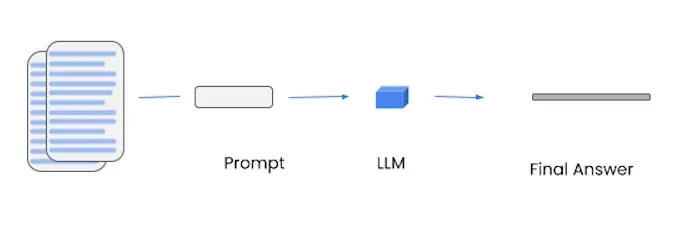

In [ ]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectorstoreFAISS.as_retriever(),
    chain_type="stuff",
)
result = qa_chain_mr({"query": question})

print("\n---------------------\n")
pprint(result)

NameError: name 'vectorstoreFAISS' is not defined

### map_reduce
It separates texts into batches, feeds each batch with the question to LLM separately, and comes up with the final answer based on the answers from each batch

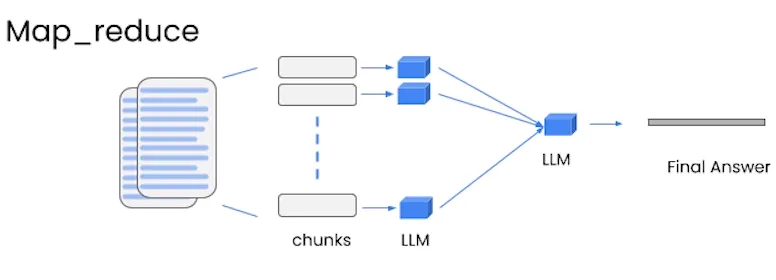

In [ ]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectorstoreFAISS.as_retriever(),
    chain_type="map_reduce",
)
result = qa_chain_mr({"query": question})

print("\n---------------------\n")
pprint(result)

### refine
It separates texts into batches, feeds the first batch to LLM, and feeds the answer and the second batch to LLM. It refines the answer by going through all the batches.

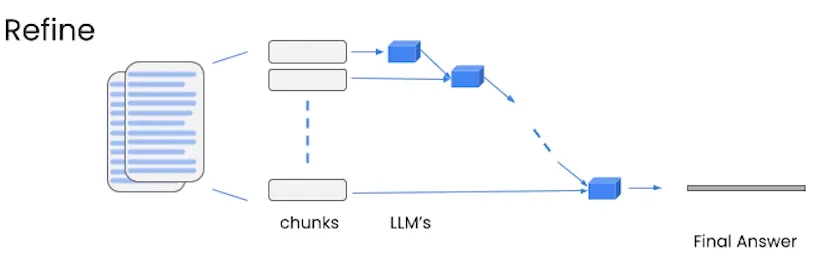

In [ ]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectorstoreFAISS.as_retriever(),
    chain_type="refine"
)
result = qa_chain_mr({"query": question})

print("\n---------------------\n")
pprint(result)

### map-rerank
It separates texts into batches, feeds each batch to LLM, returns a score of how fully it answers the question, and comes up with the final answer based on the high-scored answers from each batch.

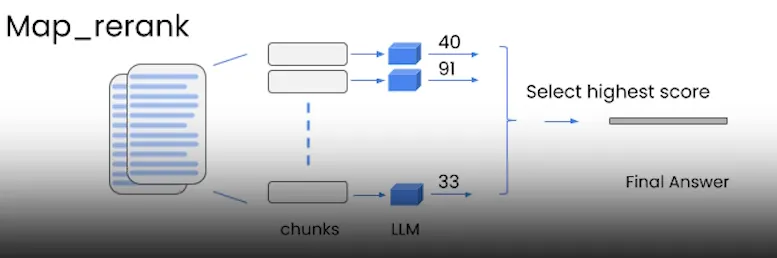

In [ ]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectorstoreFAISS.as_retriever(),
    chain_type="map_rerank"
)
result = qa_chain_mr({"query": question})

print("\n---------------------\n")
pprint(result)

<br>
<hr>



We have seen how to implement our retrieval model. It takes the user's query, retrieves relevant documents and improve the prompt in order to question the Large Language Model and return the response.

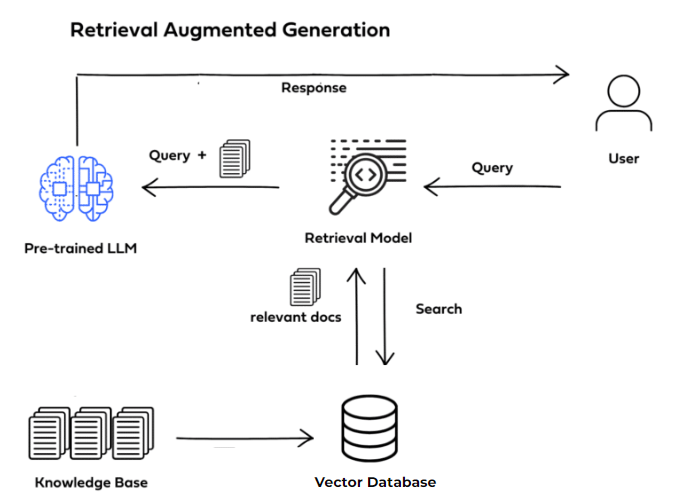

# Exercise : Combine all the above
Langchain offers a retrieval QA with memory : [ConversationalRetrievalChain](https://api.python.langchain.com/en/latest/chains/langchain.chains.conversational_retrieval.base.ConversationalRetrievalChain.html#:~:text=classmethod-,from_llm,-(llm%3A). Now it's your turn to combine everything you've seen above with the function `ConversationalRetrievalChain.from_llm(…)`. Please use the same pdf as data source.
You'll have to:
* Set the retriever (you can change the *search_type*)
* Set the memory (Summary or not, ...)
* Set the chain type (stuff, refine, ...)
* Set the system prompt (please call the variables : context, chat_history and question so that it fits the langchain syntax)
* You can set `verbose=True` to see what's going on when you run it

* Test it with some prompts and adapt the system prompt to get better answer
* Test it with different LLMs to see which one could be the best

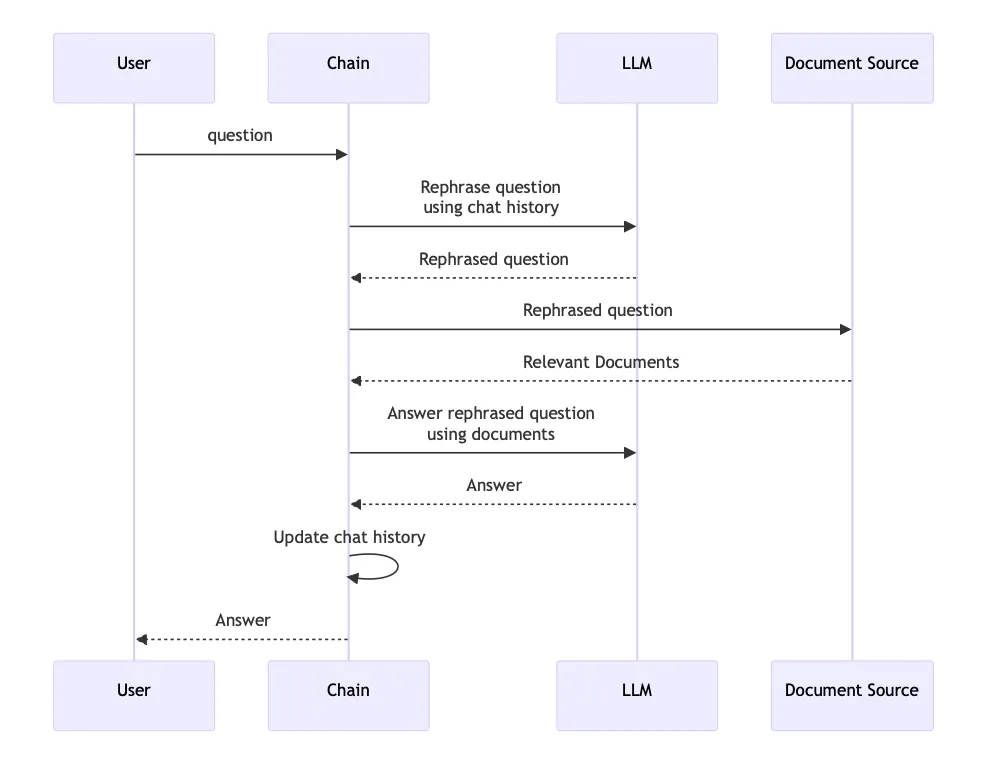

In [ ]:
# TO DO

In [ ]:
ans = qa({"question":"What are the best tools according to Maud Marchal ?"})["answer"]
print('\n\n', '-'*50, '\n')
ans = qa({"question":"Does Arnaud Blouin agree with the previous statement ?"})["answer"]
print('\n\n', '-'*50, '\n')

# Exercise : Chatbot on another data source

Choose a data connector in the following list of [Community Document Loader](https://python.langchain.com/docs/integrations/document_loaders) and make a chatbot on the data source you chose. Reuse what you've done above.

Be careful to choose :
* The right LLM to make your embeddings
* The right Splitter and size chunks/overlaps

In [ ]:
# TO DO

# Exercise : Chatbot that cites its sources

The goal now is to add sources in the response so that we can check  where the information used to answer to the query comes from.

Find a way to add the sources of the documents used to answer to the questions, and show what documents have been used for what part of the question. You could for example have a look at the [RetrievalQAWithSourcesChain](https://api.python.langchain.com/en/latest/chains/langchain.chains.qa_with_sources.retrieval.RetrievalQAWithSourcesChain.html).

In [ ]:
# TO DO